<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





### Setting up the generator

In [1]:
# Import the Data generator class from the ts_data_generator module 
from ts_data_generator import DataGen

Instantiate the generator, then</br>set start and end datetime along with the granularity.

In [2]:

d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-12"
d.to_granularity("h")

### Adding dimension
Adding a dimension needs two parameter: a name(str) and a function.</br>
The function parameter can take either integer, float, string or generator object as input.

There are some useful generator objects like `random_choice` and `random_int` in the `ts_data_generator.utils.functions` module

In [3]:
from ts_data_generator.utils.functions import random_choice, random_int
import matplotlib.pyplot as plt

d.add_dimension("product", random_choice(["A", "B", "C", "D"]))
d.add_dimension("product_id", random_int(1,10000))
d.add_dimension(name="interface", function="X Y Z".split())
d.add_dimension(name="const",function=3)

In [4]:
d.data

,epoch,product,product_id,interface,const
2019-01-01 00:00:00,1546300800,C,5543,X,3
2019-01-01 01:00:00,1546304400,D,7398,Y,3
2019-01-01 02:00:00,1546308000,A,7093,Z,3
2019-01-01 03:00:00,1546311600,B,1385,X,3
2019-01-01 04:00:00,1546315200,D,2140,Y,3
...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,2892,Z,3
2019-01-11 21:00:00,1547240400,A,6659,X,3
2019-01-11 22:00:00,1547244000,B,5288,Y,3
2019-01-11 23:00:00,1547247600,D,1262,Z,3


### Adding Metrics

Adding a metric needs two parameters: a name(str) and Trends.</br>
Trends are components that can be layered to create complex metrics. They create trends to simulate any metrics.</br>
You can club multiple trends to achieve your desired metric. Out of the box, there are four trends: Sine, Linear, Weekend, Stock


In [5]:
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend, StockTrend


d.add_metric(
    name="sinusoidal", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)
    ]
    )


d.add_metric(
    name="sinusoidal_linear", 
    trends=[
        SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5),
        LinearTrend(name="linear", limit=30, offset=10, noise_level=1)
    ])


d.add_metric(
    name="weekend_trend", 
    trends=[
        WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
    ])


d.add_metric(
    name="stock_like_trend", 
    trends=[
        StockTrend(name='stock', amplitude=10, direction='up', noise_level=0.5),
        LinearTrend(name='Linear', offset=0, noise_level=1, limit=10)
    ])

In [6]:
d

DataGen Class
  dimensions    = [
                    {"name": "product", "function": "<generator object random_choice"}
                    {"name": "product_id", "function": "<generator object random_int"}
                    {"name": "interface", "function": "<itertools.cycle object"}
                    {"name": "const", "function": "<generator object constant"}
                  ]
  metrics       = [
                    {"name": "sinusoidal", "trends": ["sine"], "aggregation_type": "mean"}
                    {"name": "sinusoidal_linear", "trends": ["sine", "linear"], "aggregation_type": "mean"}
                    {"name": "weekend_trend", "trends": ["weekend"], "aggregation_type": "mean"}
                    {"name": "stock_like_trend", "trends": ["stock", "Linear"], "aggregation_type": "mean"}
                  ]
  multi_items   = [
                  ]
  start         = 2019-01-01
  end           = 2019-01-12
  granularity   = HOURLY

### Plot the data
Since the dataset in pandas, only numeric data is plotted.</br>
You exclude or include columns with the arguments `exclude` and `include`

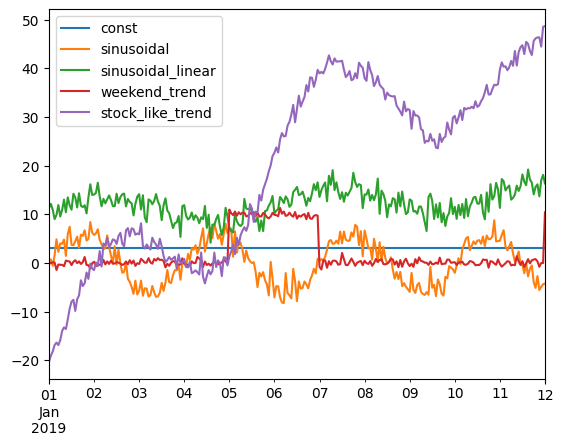

In [7]:
d.plot(exclude=['product_id'])

In [8]:
d.data

,epoch,product,product_id,interface,const,sinusoidal,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,5543,X,3,-0.438779,11.306243,-0.001551,-20.377640
2019-01-01 01:00:00,1546304400,D,7398,Y,3,0.720928,12.136447,-0.067570,-19.037217
2019-01-01 02:00:00,1546308000,A,7093,Z,3,-0.592340,10.937615,0.128940,-18.214816
2019-01-01 03:00:00,1546311600,B,1385,X,3,1.581762,8.999129,0.083810,-16.877203
2019-01-01 04:00:00,1546315200,D,2140,Y,3,4.853439,9.858354,-1.452849,-16.373338
...,...,...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,2892,Z,3,-2.708352,16.152811,0.328036,46.335794
2019-01-11 21:00:00,1547240400,A,6659,X,3,-5.564733,13.667111,-0.794685,46.355708
2019-01-11 22:00:00,1547244000,B,5288,Y,3,-4.924181,16.987477,-0.014719,44.446675
2019-01-11 23:00:00,1547247600,D,1262,Z,3,-4.369743,18.099319,-0.023506,48.510615


### Removing a metric or dimension
You can remove a dimension or metric from the generator using the name

In [9]:
d.remove_dimension('product_id')
d.remove_metric('sinusoidal')
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,C,X,3,11.306243,-0.001551,-20.377640
2019-01-01 01:00:00,1546304400,D,Y,3,12.136447,-0.067570,-19.037217
2019-01-01 02:00:00,1546308000,A,Z,3,10.937615,0.128940,-18.214816
2019-01-01 03:00:00,1546311600,B,X,3,8.999129,0.083810,-16.877203
2019-01-01 04:00:00,1546315200,D,Y,3,9.858354,-1.452849,-16.373338
...,...,...,...,...,...,...,...
2019-01-11 20:00:00,1547236800,A,Z,3,16.152811,0.328036,46.335794
2019-01-11 21:00:00,1547240400,A,X,3,13.667111,-0.794685,46.355708
2019-01-11 22:00:00,1547244000,B,Y,3,16.987477,-0.014719,44.446675
2019-01-11 23:00:00,1547247600,D,Z,3,18.099319,-0.023506,48.510615


### Extending time range
Changing the start or end datetime if automatically generate the data for all columns

In [10]:
d.end_datetime = '2019-01-12 01:05:00'
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend
2019-01-01 00:00:00,1546300800,B,Y,3,9.199233,-1.031592,-20.694875
2019-01-01 01:00:00,1546304400,B,Z,3,8.809347,0.701827,-19.038794
2019-01-01 02:00:00,1546308000,D,X,3,10.490116,0.302243,-18.976655
2019-01-01 03:00:00,1546311600,A,Y,3,11.404111,-0.210471,-18.493191
2019-01-01 04:00:00,1546315200,C,Z,3,10.287843,-0.355518,-19.099872
...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,17.358774,-0.123200,48.124958
2019-01-11 22:00:00,1547244000,B,Z,3,16.647630,-0.109656,47.409713
2019-01-11 23:00:00,1547247600,C,X,3,15.882499,0.534850,48.548853
2019-01-12 00:00:00,1547251200,B,Y,3,15.414522,10.288520,49.582787


### Adding multi dimension/metric
In case you want to add a dimensions or metrics that are linked

In [11]:
import random
def my_custom_function():
    while True:
        val1 = random.randint(1,100)
        val2 =  random.randint(1,100)
        val3 = val1 + val2
        yield (val1, val2, val3)

d.add_multi_items(names="val1 val2 val3".split(), function=my_custom_function(), aggregation_type="sum avg min".split())

    

In [12]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3
2019-01-01 00:00:00,1546300800,B,Y,3,9.199233,-1.031592,-20.694875,6,24,30
2019-01-01 01:00:00,1546304400,B,Z,3,8.809347,0.701827,-19.038794,33,42,75
2019-01-01 02:00:00,1546308000,D,X,3,10.490116,0.302243,-18.976655,46,80,126
2019-01-01 03:00:00,1546311600,A,Y,3,11.404111,-0.210471,-18.493191,7,68,75
2019-01-01 04:00:00,1546315200,C,Z,3,10.287843,-0.355518,-19.099872,94,55,149
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,17.358774,-0.123200,48.124958,56,83,139
2019-01-11 22:00:00,1547244000,B,Z,3,16.647630,-0.109656,47.409713,1,41,42
2019-01-11 23:00:00,1547247600,C,X,3,15.882499,0.534850,48.548853,20,46,66
2019-01-12 00:00:00,1547251200,B,Y,3,15.414522,10.288520,49.582787,3,19,22


In [13]:
d.add_multi_items(names="val4 val5 val6".split(), function=my_custom_function())

In [14]:
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val1,val2,val3,val4,val5,val6
2019-01-01 00:00:00,1546300800,B,Y,3,9.199233,-1.031592,-20.694875,6,24,30,85,97,182
2019-01-01 01:00:00,1546304400,B,Z,3,8.809347,0.701827,-19.038794,33,42,75,18,72,90
2019-01-01 02:00:00,1546308000,D,X,3,10.490116,0.302243,-18.976655,46,80,126,40,35,75
2019-01-01 03:00:00,1546311600,A,Y,3,11.404111,-0.210471,-18.493191,7,68,75,81,60,141
2019-01-01 04:00:00,1546315200,C,Z,3,10.287843,-0.355518,-19.099872,94,55,149,91,93,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,17.358774,-0.123200,48.124958,56,83,139,90,25,115
2019-01-11 22:00:00,1547244000,B,Z,3,16.647630,-0.109656,47.409713,1,41,42,11,28,39
2019-01-11 23:00:00,1547247600,C,X,3,15.882499,0.534850,48.548853,20,46,66,33,88,121
2019-01-12 00:00:00,1547251200,B,Y,3,15.414522,10.288520,49.582787,3,19,22,90,46,136


In [15]:
d.remove_multi_item(["val1"])
d.data

,epoch,product,interface,const,sinusoidal_linear,weekend_trend,stock_like_trend,val4,val5,val6
2019-01-01 00:00:00,1546300800,B,Y,3,9.199233,-1.031592,-20.694875,85,97,182
2019-01-01 01:00:00,1546304400,B,Z,3,8.809347,0.701827,-19.038794,18,72,90
2019-01-01 02:00:00,1546308000,D,X,3,10.490116,0.302243,-18.976655,40,35,75
2019-01-01 03:00:00,1546311600,A,Y,3,11.404111,-0.210471,-18.493191,81,60,141
2019-01-01 04:00:00,1546315200,C,Z,3,10.287843,-0.355518,-19.099872,91,93,184
...,...,...,...,...,...,...,...,...,...,...
2019-01-11 21:00:00,1547240400,B,Y,3,17.358774,-0.123200,48.124958,90,25,115
2019-01-11 22:00:00,1547244000,B,Z,3,16.647630,-0.109656,47.409713,11,28,39
2019-01-11 23:00:00,1547247600,C,X,3,15.882499,0.534850,48.548853,33,88,121
2019-01-12 00:00:00,1547251200,B,Y,3,15.414522,10.288520,49.582787,90,46,136


In [16]:
d

DataGen Class
  dimensions    = [
                    {"name": "product", "function": "<generator object random_choice"}
                    {"name": "interface", "function": "<itertools.cycle object"}
                    {"name": "const", "function": "<generator object constant"}
                  ]
  metrics       = [
                    {"name": "sinusoidal_linear", "trends": ["sine", "linear"], "aggregation_type": "mean"}
                    {"name": "weekend_trend", "trends": ["weekend"], "aggregation_type": "mean"}
                    {"name": "stock_like_trend", "trends": ["stock", "Linear"], "aggregation_type": "mean"}
                  ]
  multi_items   = [
                    {"names": ["val4", "val5", "val6"], "function": "<generator object my_custom_function"}
                  ]
  start         = 2019-01-01
  end           = 2019-01-12 01:05:00
  granularity   = HOURLY

### Aggregate data

Checkout this notebook: [Aggregate](https://github.com/manojmanivannan/ts-data-generator/blob/main/notebooks/aggregate.ipynb)